In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import geopandas as gpd
from bs4 import BeautifulSoup
from prettytable import PrettyTable

In [2]:
url = "https://www.mohfw.gov.in/data/datanew.json"
headers = { }
response = requests.get(url, headers=headers)
if (response.status_code != 200):
    print(str(response.text.encode('utf8'))+"Something went wrong fetching the data")
    sys.exit()
data = json.loads(response.content)
df = pd.DataFrame(data)


In [3]:
df['active']=df['active'].map(int)
df['positive']=df['positive'].map(int)
df['cured']=df['cured'].map(int)
df['death']=df['death'].map(int)
df['new_active']=df['new_active'].map(int)
df['new_positive']=df['new_positive'].map(int)
df['new_cured']=df['new_cured'].map(int)
df['new_death']=df['new_death'].map(int)

In [4]:
india_map = gpd.read_file(r'C://Users//surabhi//Downloads//india_administrative_state_boundary')
#india_map

In [5]:
india_map = india_map.rename(columns = {'st_nm':'state_name'})
india_map["state_name"].replace("Andaman & Nicobar Island","Andaman and Nicobar Islands", inplace = True)
india_map["state_name"].replace("NCT of Delhi","Delhi", inplace = True)
india_map["state_name"].replace("Telangana","Telengana", inplace = True)
india_map["state_name"].replace("Jammu & Kashmir","Jammu and Kashmir", inplace = True)
india_map["state_name"].replace("Arunanchal Pradesh","Arunachal Pradesh", inplace = True)

del df['sno']

In [6]:
def covid_19_table():
    return df;
#covid_19_table()

In [7]:
india_data = india_map.merge(df, on="state_name", how = 'inner')
#india_data

In [8]:
#Positive Cases Figure
def india_positive_cases():
    
    fig = plt.figure()
    india_data.plot(column = 'positive',figsize=(20, 10),cmap = "Blues", edgecolors = "blue", linewidth = 0.4, legend=True)
    plt.suptitle('COVID 19 India: Positive Cases',fontsize=20)
    plt.title('*color scale in multiples of 1 million ',fontsize=10,color = "Black", fontstyle='oblique')
    p = plt.show()
    return p;


In [9]:
#Active Cases Figure
def india_active_cases():
    fig = plt.figure()
    india_data.plot(column = 'active',figsize=(20, 10),cmap = "Reds", edgecolors = "red", linewidth = 0.5, legend=True)
    plt.suptitle('COVID 19 India: Active Cases',fontsize=20)
    a=plt.show()
    return a;

In [10]:
#Cured Cases Figure
def india_cured_cases():
    fig = plt.figure()
    india_data.plot(column = 'cured',figsize=(20, 10),cmap = "Greens", edgecolors = "green", linewidth = 0.6, legend=True)
    plt.suptitle('COVID 19 India: Cured Cases\n ',fontsize=20)
    plt.title('*color scale in multiples of 1 million ',fontsize=10,color = "Black", fontstyle='oblique')
    c=plt.show()
    return c;

In [11]:
def india_dead_cases():
    fig = plt.figure()
    india_data.plot(column = 'death',figsize=(20, 10),cmap = "gray_r", edgecolors = "Gray", linewidth = 0.5,  legend=True)
    plt.suptitle('COVID 19 India: Death Cases',fontsize=20)
    d=plt.show()
    return d;

In [12]:
def india_covid_19_cases_bar_graph():
    sns.set_style("ticks")
    plt.figure(figsize = (17,20))
    plt.barh(india_data["state_name"],     india_data["active"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
    plt.xlabel('No. of Active cases', fontsize = 18)
    plt.ylabel('States/UT', fontsize = 18)
    plt.gca().invert_yaxis()
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('Total Active Cases Statewise', fontsize = 18 )
    for index, value in enumerate(india_data["active"]):
        plt.text(value, index, str(value), fontsize = 14)
    bg=plt.show()
    return bg;

In [23]:
def india_covid_19_cases_pie_chart():
    group_size = [sum(india_data['active']),
              sum(india_data['cured']),
              sum(india_data['death'])]
    group_labels = ['positive\n' + str(sum(india_data['active'])),
                'cured\n' + str(sum(india_data['cured'])),
                'death\n' + str(sum(india_data['death']))]
    custom_colors = ['Blue','Green','Red']
    plt.figure(figsize = (5,5))
    plt.pie(group_size, labels = group_labels, colors = custom_colors)
    central_circle = plt.Circle((0,0), 0.5, color = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(central_circle)
    plt.rc('font', size = 12)
    plt.title('Nationwide total active, cured and death Cases', fontsize = 20)
    pch = plt.show()
    return pch;

In [14]:
covid_19_table()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,199,6426,6149,78,214,6470,6175,81,35
1,Andhra Pradesh,195102,1322934,1118933,8899,197370,1344386,1138028,8988,28
2,Arunachal Pradesh,1924,20575,18583,68,2094,20854,18691,69,12
3,Assam,40611,304429,261980,1838,42317,310086,265860,1909,18
4,Bihar,102100,612570,507041,3429,99624,622433,519306,3503,10
5,Chandigarh,8625,51857,42647,585,8528,52633,43506,599,04
6,Chhattisgarh,121836,873060,740283,10941,122798,883210,749318,11094,22
7,Dadra and Nagar Haveli and Daman and Diu,1103,9021,7914,4,1060,9150,8086,4,26
8,Delhi,83809,1348699,1244880,20010,82725,1361986,1258951,20310,07
9,Goa,32836,124774,90134,1804,32791,127639,92974,1874,30


<Figure size 432x288 with 0 Axes>

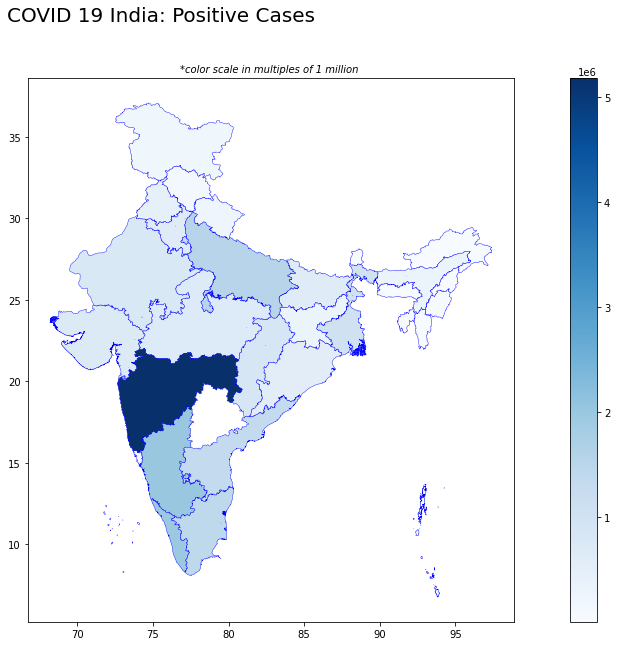

In [15]:
india_positive_cases()

<Figure size 432x288 with 0 Axes>

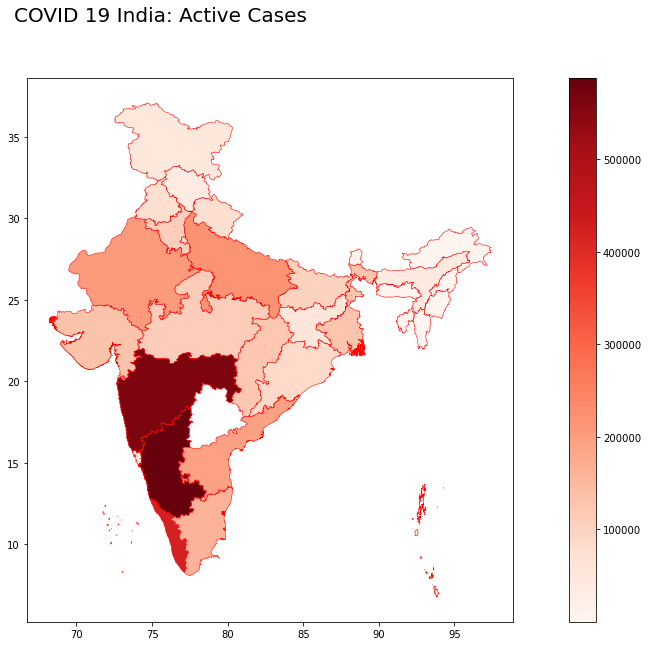

In [16]:
india_active_cases()

<Figure size 432x288 with 0 Axes>

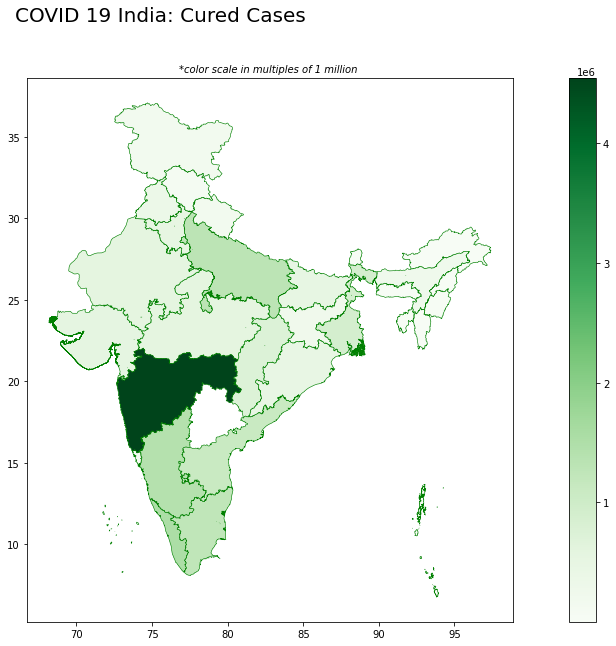

In [17]:
india_cured_cases()

<Figure size 432x288 with 0 Axes>

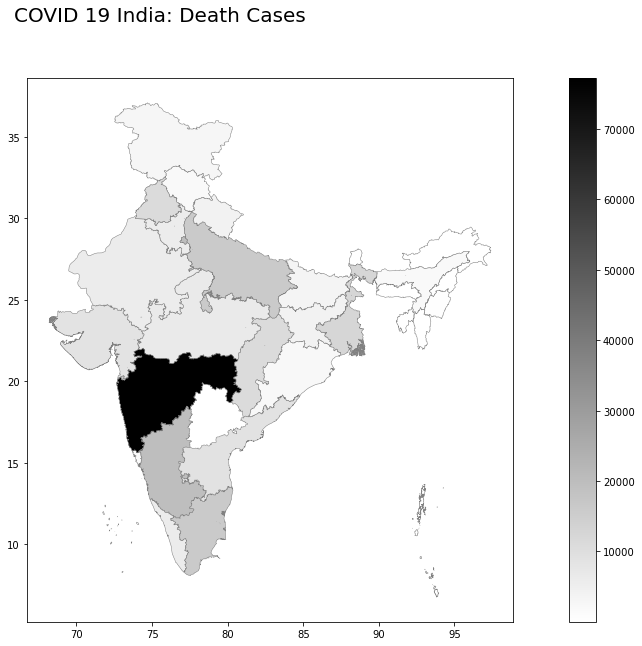

In [18]:
india_dead_cases()

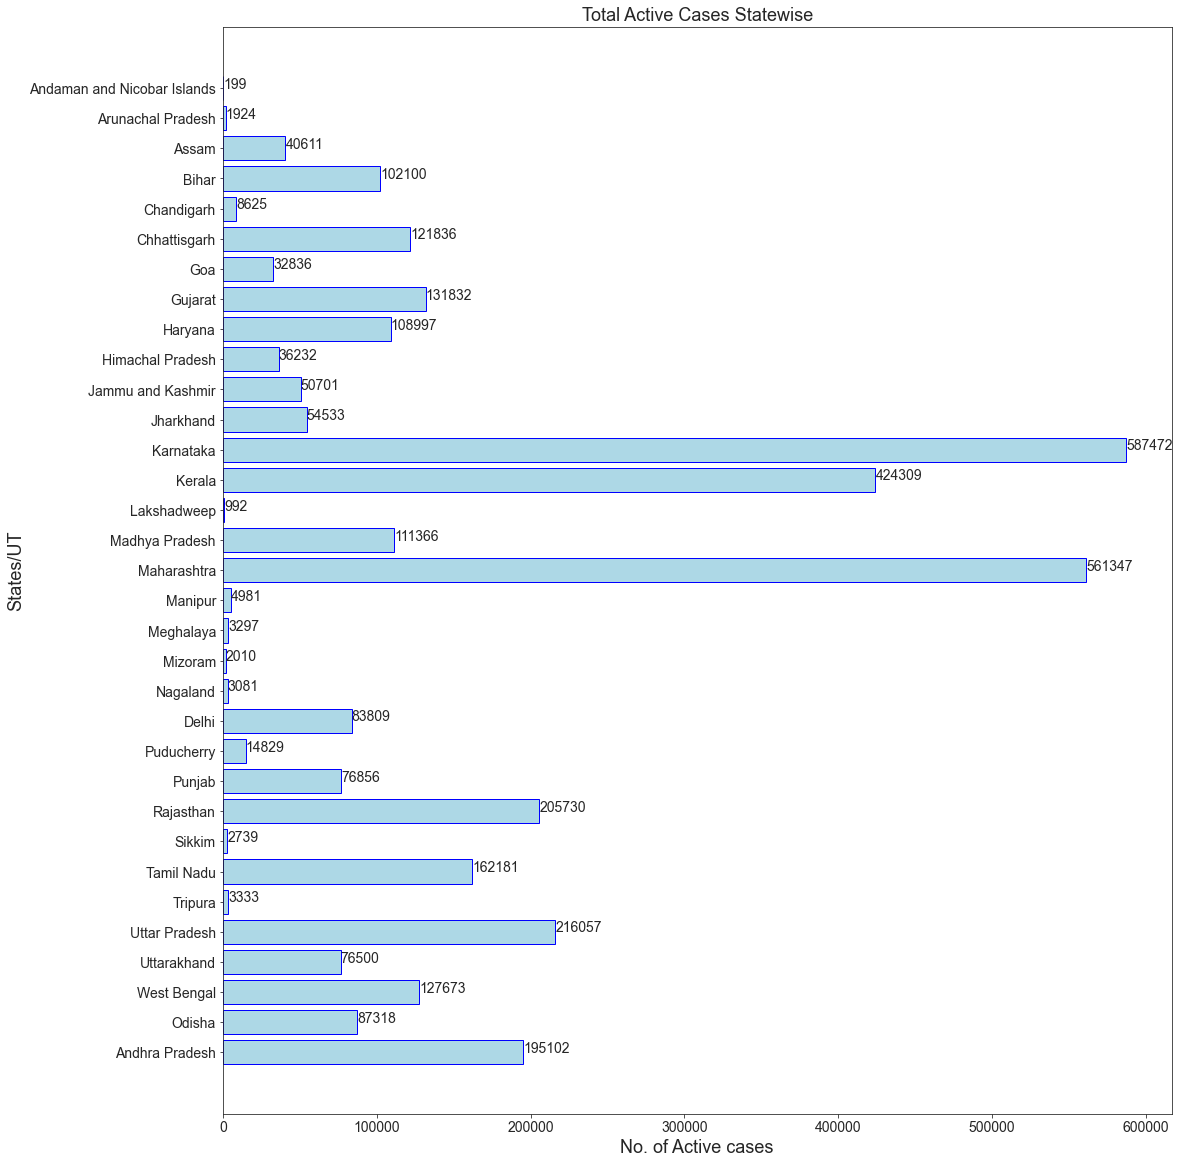

In [19]:
india_covid_19_cases_bar_graph()

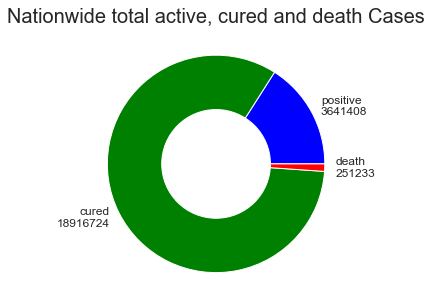

In [24]:
india_covid_19_cases_pie_chart()